In [17]:
import matplotlib.pyplot as plt
import numpy as np

FILENAME = "2024-05-24.csv"

csvfile = open(FILENAME, "r")

runs = []

In [18]:
def find_zero_crossings(x, y):
    zero_crossings = []
    x_cross = None
    final_crossing = 0.0
    for i in range(1, len(x)):
        if y[i-1] * y[i] < 0:
            x_cross = x[i-1] - y[i-1] * (x[i] - x[i-1]) / (y[i] - y[i-1])
        elif y[i-1] * y[i] == 0:
            x_cross = x[i]
        if x_cross and zero_crossings:
            if x_cross-zero_crossings[-1]>0.01:
                zero_crossings.append(x_cross)
        elif x_cross:
            zero_crossings.append(x_cross)
    for z,val in enumerate(reversed(y)):
        if val < -0.005:
            final_crossing = x[len(x)-z]
            zero_crossings.append(final_crossing)
            break
    zero_crossings.sort()
    crossing_cutoff = zero_crossings.index(final_crossing) +1
    zero_crossings = zero_crossings[:crossing_cutoff]    
    return zero_crossings, [0 for _ in range(len(zero_crossings))]

# End FUNCS

In [19]:
csv_rows = list(map(lambda x:x.split(","), csvfile.readlines()))

series = []

for i,title in enumerate(csv_rows[0]):
    if title.startswith('"Time'):
        x = []
        y = []
        for j in range(1, len(csv_rows) - 1):
            xValue = float(csv_rows[j][i]) if csv_rows[j][i] else -1
            if xValue >= 0:
                x.append(xValue)
                yValue = float(csv_rows[j][i+1]) if csv_rows[j][i+1] else 0
                y.append(yValue)
        series.append(x)
        series.append(y)

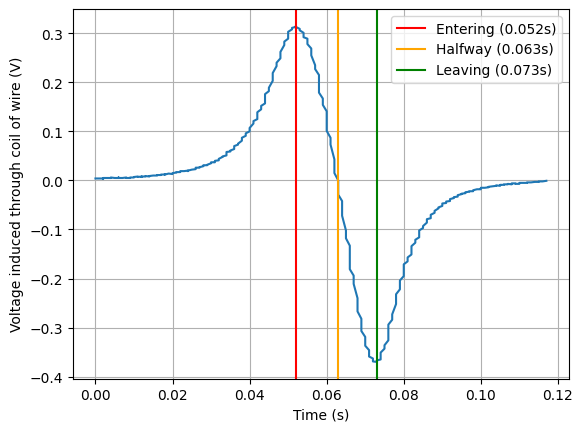

In [20]:
zero_crossings = find_zero_crossings(series[0], series[1])
zero_timings = (zero_crossings[0][1:14:2], zero_crossings[1][1:14:2])
cutoff = series[0].index(zero_timings[0][0])
plt.figure(dpi=100)
plt.plot(series[0][:cutoff], series[1][:cutoff])
plt.axvline(x = series[0][series[1].index(max(series[1][:cutoff]))], color = 'r', label = f'Entering ({series[0][series[1].index(max(series[1][:cutoff]))]:.3f}s)')
plt.axvline(x = zero_crossings[0][0], color = 'orange', label = f'Halfway ({zero_crossings[0][0]:.3f}s)')
plt.axvline(x = series[0][series[1].index(min(series[1][:cutoff]))], color = 'g', label = f'Leaving ({series[0][series[1].index(min(series[1][:cutoff]))]:.3f}s)')
# plt.scatter(*zero_crossings,color = 'gold', marker="x")
# plt.scatter(*zero_timings,color = 'red', marker="x")
# plt.title(f'RUN {i//2}')
plt.ylabel('Voltage induced through coil of wire (V)')
plt.xlabel('Time (s)')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

In [21]:
all_accelerations = [] 
all_average_accelerations = []

In [22]:
for i in range(0, len(series) - 1, 2):
    zero_crossings = find_zero_crossings(series[i], series[i + 1])
    zero_timings = (zero_crossings[0][1:14:2], zero_crossings[1][1:14:2])
    speeds = []
    accelerations = []

    print("Calculating speeds...")
    for j in range(1, len(zero_timings[0])):
        time_gap = zero_timings[0][j] - zero_timings[0][j - 1]
        speed = 0.149 / time_gap 
        speeds.append((speed, zero_timings[0][j]))
        print(f"Speed {j}: {speed:.3f} m/s at time {zero_timings[0][j]:.3f}s (between {zero_timings[0][j - 1]:.3f}s and {zero_timings[0][j]:.3f}s, time gap: {time_gap:.3f}s)")

    print("Calculating accelerations...")
    for j in range(1, len(speeds)):
        time_gap = speeds[j][1] - speeds[j - 1][1]
        accel = (speeds[j][0] - speeds[j - 1][0]) / time_gap
        accelerations.append(accel)
        print(f"Acceleration between {speeds[j - 1][1]:.3f}s and {speeds[j][1]:.3f}s: {accel:.3f} m/s^2")
    if accelerations:
        avg_acceleration = np.mean(accelerations[:-1])
        std_acceleration = np.std(accelerations[:-1])
        print(f"Average acceleration: {avg_acceleration:.3f} m/s^2")
        print(f"Standard deviation of accelerations: {std_acceleration:.3f} m/s^2")
        print(f"Deviation from g: {avg_acceleration - 9.81:.3f} m/s^2")
        all_average_accelerations.append(avg_acceleration)
    else:
        print("No accelerations calculated.")

    print(zero_timings)
    # plt.figure(dpi=100)
    # plt.plot(series[i], series[i + 1])
    # plt.scatter(*zero_crossings,color = 'yellow', marker="x")
    # plt.scatter(*zero_timings,color = 'red', marker="x")
    # plt.title(f'RUN {(i//2)+1}')
    # plt.ylabel('Voltage induced through coils in series (V)')
    # plt.xlabel('Time (s)')
    # plt.grid()
    # plt.show()
    all_accelerations.append(accelerations)
    pass
    pass

Calculating speeds...
Speed 1: 1.910 m/s at time 0.196s (between 0.118s and 0.196s, time gap: 0.078s)
Speed 2: 2.569 m/s at time 0.254s (between 0.196s and 0.254s, time gap: 0.058s)
Speed 3: 2.980 m/s at time 0.304s (between 0.254s and 0.304s, time gap: 0.050s)
Speed 4: 3.465 m/s at time 0.347s (between 0.304s and 0.347s, time gap: 0.043s)
Speed 5: 3.821 m/s at time 0.386s (between 0.347s and 0.386s, time gap: 0.039s)
Speed 6: 3.725 m/s at time 0.426s (between 0.386s and 0.426s, time gap: 0.040s)
Calculating accelerations...
Acceleration between 0.196s and 0.254s: 11.357 m/s^2
Acceleration between 0.254s and 0.304s: 8.221 m/s^2
Acceleration between 0.304s and 0.347s: 11.282 m/s^2
Acceleration between 0.347s and 0.386s: 9.113 m/s^2
Acceleration between 0.386s and 0.426s: -2.388 m/s^2
Average acceleration: 9.993 m/s^2
Standard deviation of accelerations: 1.364 m/s^2
Deviation from g: 0.183 m/s^2
([0.118, 0.196, 0.254, 0.304, 0.347, 0.386, 0.426], [0, 0, 0, 0, 0, 0, 0])
Calculating speeds

In [23]:
average_accelerations = [sum(list(zip(*all_accelerations))[i])/len(all_accelerations) for i in range(len(list(zip(*all_accelerations))))]
print(average_accelerations, sum(all_average_accelerations)/len(all_average_accelerations))

[10.622972750823617, 9.258367426641486, 10.20346395761978, 9.006092138522636, -1.8512612911437318] 9.772724068401882


[10.61298842827163, 9.260999697415805, 10.2834841825042, 9.112731831873292, -1.9894213494954989] 7.456156558113885


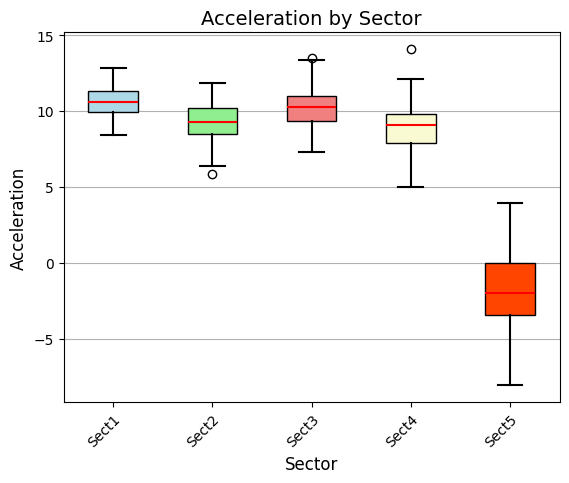

In [26]:
fig, ax = plt.subplots()

# Creating the boxplot
box = ax.boxplot(list(zip(*all_accelerations)), patch_artist=True)

# Customizing the boxplot with colors and other elements
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow', 'orangered']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Customizing other elements like whiskers, caps, and medians
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
for median in box['medians']:
    median.set(color='red', linewidth=1.5)

medians = (list(map(lambda x:np.median(x), list(zip(*all_accelerations)))))
print(medians,np.mean(medians))


# Set x-axis labels
ax.set_xticklabels(['Sect1', 'Sect2', 'Sect3', 'Sect4', 'Sect5'])

# Add grid lines for better readability
ax.yaxis.grid(True)

# Adding axis labels and title
ax.set_xlabel('Sector', fontsize=12)
ax.set_ylabel('Acceleration', fontsize=12)
ax.set_title('Acceleration by Sector', fontsize=14)

# Rotate x-axis labels if needed
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Show plot
plt.show()

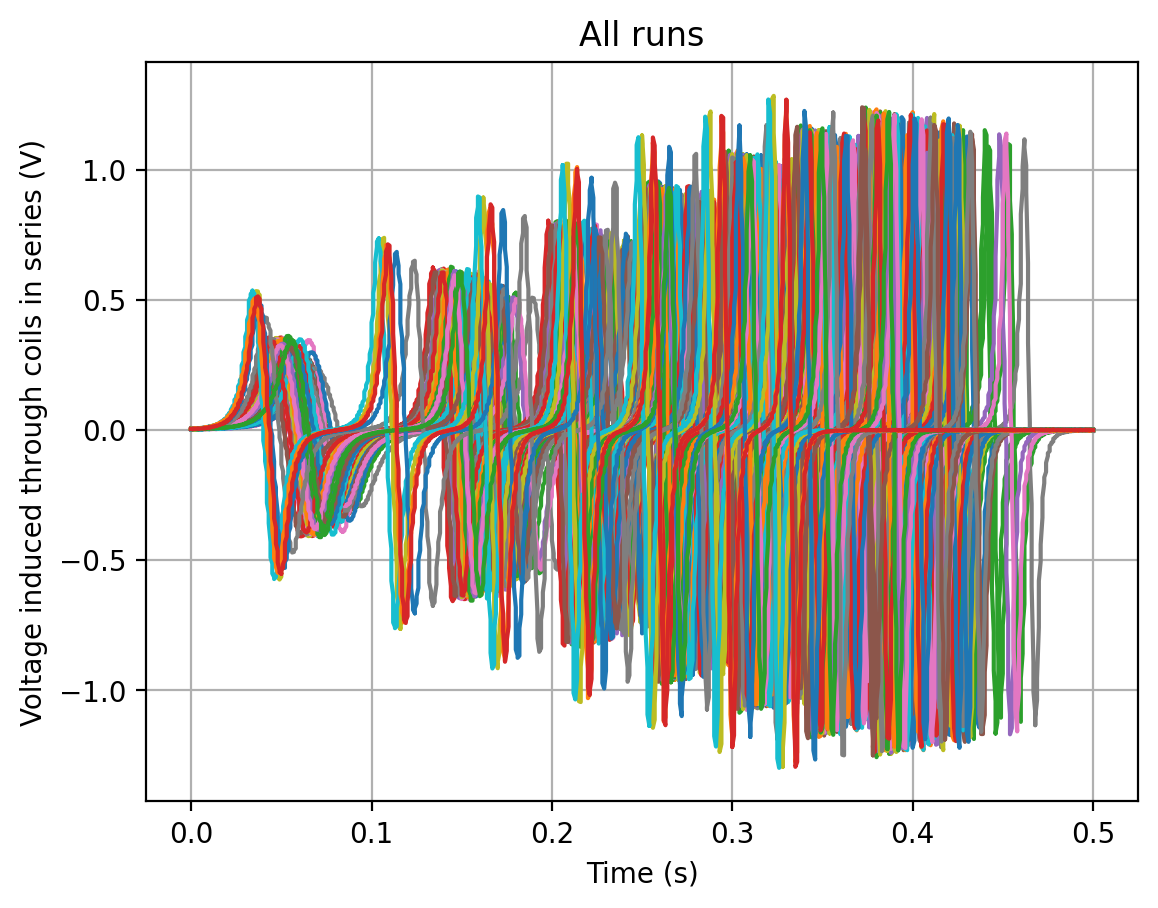

In [25]:
plt.figure(dpi=200)
plt.plot(*series)
plt.title('All runs')
plt.ylabel('Voltage induced through coils in series (V)')
plt.xlabel('Time (s)')
plt.grid()

plt.show()